# Date-A-Scientist
Codecademy Data Science - Machine Learning Capstone Project

In [182]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [183]:
df = pd.read_csv("profiles.csv")
print(df.head(6))

   age       body_type               diet    drinks      drugs  \
0   22  a little extra  strictly anything  socially      never   
1   35         average       mostly other     often  sometimes   
2   38            thin           anything  socially        NaN   
3   23            thin         vegetarian  socially        NaN   
4   29        athletic                NaN  socially      never   
5   29         average    mostly anything  socially        NaN   

                           education  \
0      working on college/university   
1              working on space camp   
2     graduated from masters program   
3      working on college/university   
4  graduated from college/university   
5  graduated from college/university   

                                              essay0  \
0  about me:<br />\n<br />\ni would love to think...   
1  i am a chef: this is what that means.<br />\n1...   
2  i'm not ashamed of much, but writing public te...   
3          i work in a library a

In [184]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

A little legend to the essays:

essay0 - My self summary

essay1 - What I’m doing with my life

essay2 - I’m really good at

essay3 - The first thing people usually notice about me

essay4 - Favorite books, movies, show, music, and food

essay5 - The six things I could never do without

essay6 - I spend a lot of time thinking about

essay7 - On a typical Friday night I am

essay8 - The most private thing I am willing to admit

essay9 - You should message me if…

In [185]:
print(df.offspring.value_counts(dropna=False))

NaN                                                    35561
doesn&rsquo;t have kids                                 7560
doesn&rsquo;t have kids, but might want them            3875
doesn&rsquo;t have kids, but wants them                 3565
doesn&rsquo;t want kids                                 2927
has kids                                                1883
has a kid                                               1881
doesn&rsquo;t have kids, and doesn&rsquo;t want any     1132
has kids, but doesn&rsquo;t want more                    442
has a kid, but doesn&rsquo;t want more                   275
has a kid, and might want more                           231
wants kids                                               225
might want kids                                          182
has kids, and might want more                            115
has a kid, and wants more                                 71
has kids, and wants more                                  21
Name: offspring, dtype: 

In [186]:
print(df.sex.value_counts(dropna=False))

m    35829
f    24117
Name: sex, dtype: int64


In [187]:
print(df.religion.value_counts(dropna=False))

NaN                                           20226
agnosticism                                    2724
other                                          2691
agnosticism but not too serious about it       2636
agnosticism and laughing about it              2496
catholicism but not too serious about it       2318
atheism                                        2175
other and laughing about it                    2119
atheism and laughing about it                  2074
christianity                                   1957
christianity but not too serious about it      1952
other but not too serious about it             1554
judaism but not too serious about it           1517
atheism but not too serious about it           1318
catholicism                                    1064
christianity and somewhat serious about it      927
atheism and somewhat serious about it           848
other and somewhat serious about it             846
catholicism and laughing about it               726
judaism and 

In [188]:
print(df.education.value_counts())

graduated from college/university    23959
graduated from masters program        8961
working on college/university         5712
working on masters program            1683
graduated from two-year college       1531
graduated from high school            1428
graduated from ph.d program           1272
graduated from law school             1122
working on two-year college           1074
dropped out of college/university      995
working on ph.d program                983
college/university                     801
graduated from space camp              657
dropped out of space camp              523
graduated from med school              446
working on space camp                  445
working on law school                  269
two-year college                       222
working on med school                  212
dropped out of two-year college        191
dropped out of masters program         140
masters program                        136
dropped out of ph.d program            127
dropped out

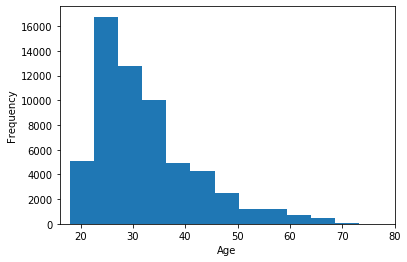

In [189]:
# Codecademy-provided sample visualization of the distribution of ages
plt.hist(df.age, bins=20)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.xlim(16, 80)
plt.show()

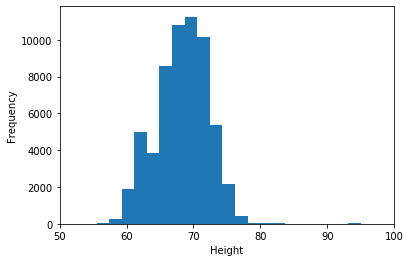

In [191]:
# Let's visualize the distribution of heights
plt.hist(df.height, bins=50)
plt.xlabel("Height")
plt.ylabel("Frequency")
plt.xlim(50, 100)
plt.show()

What I am interested in predicting:
- Offspring

Features I would like to look at:
- Sex
- Religion
- Education
- all essays if it contains "kids", "kid", "child", "children", "son", "daughter", "sons", "daughters"

We can break down the responses given in the "offspring" column into the following two categories:

(1) Does or does not have kids
    - Has kids
    - Has a kid
    - Does not have kids
    - No response
   
(2) Attitude towards having (more) kids:
    - Wants / wants more - max
    - Might want / might want more
    - Not given
    - Does not want any / does not want more - minimum

In [192]:
# Drop all the NaN values
df = df.dropna(subset=['offspring', 'education'])
print(df.offspring.head())

0    doesn&rsquo;t have kids, but might want them
1    doesn&rsquo;t have kids, but might want them
3                         doesn&rsquo;t want kids
5    doesn&rsquo;t have kids, but might want them
7         doesn&rsquo;t have kids, but wants them
Name: offspring, dtype: object


In [193]:
# Let's create a column called "has_offspring" which records 0 if the person does not have any kids, 
# and 1 if the person has a kid or has kids

# If the response contains this string: "doesn&rsquo;t have kids" - record a 0
# If the response contains these strings: "has kids" or "has a kid" - record a 1
# If the response contains neither - record NaN

def find_kids(response):
    if response.find("doesn&rsquo;t have kids") >= 0:    
        return 0
    elif response.find("has kids") >= 0 or response.find("has a kid") >= 0:
        return 1
    else:
        return float("NaN")

df['has_offspring'] = df['offspring'].apply(find_kids)

# There are three possible responses in which the responder does not have to specify whether they have or don't have
# kids: "doesn&rsquo;t want kids", "wants kids",  "might want kids". These have now been recorded as a NaN.
# I don't feel comfortable assuming either way for these responses, so let us drop these from the dataset.

df = df.dropna(subset=["has_offspring"])

In [222]:
print(df.has_offspring.value_counts(dropna=False))

percentage_with_kids = len(df[df.has_offspring == 1]) / len(df.has_offspring)
print(percentage_with_kids)

0.0    15033
1.0     4343
Name: has_offspring, dtype: int64
0.2241432700247729


In [195]:
# Condensed all the education responses into numerical values, on a scale:
# Below high school: 0 | High School grad: 1 | Other tertiary grad: 2 | 
# University undergrad: 3 | University postgrad: 4

education_mapping = {"dropped out of high school": 0,\
                     "working on high school": 0,\
                     "graduated from high school": 1,\
                     "working on college/university": 1,\
                     "working on two-year college": 1,\
                     "dropped out of college/university": 1,\
                     "dropped out of space camp": 1,\
                     "high school": 1,
                     "working on space camp": 1,\
                     "dropped out of two-year college": 1,\
                     "graduated from two-year college": 2,\
                     "two-year college": 2,\
                     "graduated from space camp": 2,\
                     "space camp": 2,\
                     "graduated from college/university": 3,\
                     "working on masters program": 3,\
                     "working on ph.d program": 3,\
                     "college/university": 3,\
                     "working on law school": 3,\
                     "working on med school": 3,\
                     "dropped out of masters program": 3,\
                     "masters program": 3,\
                     "ph.d program": 3,\
                     "law school": 3,\
                     "med school": 3,\
                     "dropped out of law school": 3,\
                     "dropped out of med school": 3,\
                     "graduated from masters program": 4,\
                     "graduated from ph.d program": 4,\
                     "graduated from law school": 4,\
                     "graduated from med school": 4,\
                     "dropped out of ph.d program": 4}

df["education_numeric"] = df.education.map(education_mapping)

# Replace all NaN values in the "education_numeric" column with 0 as well
df["education_numeric"] = df["education_numeric"].fillna(value=0)

print(df.education_numeric.value_counts(dropna=False))

3    9841
4    4569
1    3798
2    1095
0      73
Name: education_numeric, dtype: int64


In [196]:
print(type(df.religion[8]))

# Replace all NaN values in the "religion" column with the string "no answer"
df["religion"] = df["religion"].fillna(value="no answer")

#print(df.religion.value_counts(dropna=False))

<class 'str'>


Let's classify the following responses as "not religious" and assign the numerical value of 0:
    - any response containing the word "agnostism" regardless of degree
    - any response containing the word "atheism" regardless of degree
    - any religion with the note, "and laughing about it

Let's classify the following responses as "a bit religious" and assign the numerical value of 1:
    - any religion (except agnostism and atheism) with the note, "but not too serious about it"

Let's classify the following responses as "religious" and assign the numerical value of 2: 
    - any religion (except agnostism and atheism) which has no note attached: christianity, other, catholicism, judaism, buddhism, hinduism, islam
    - any religion (except agnostism and atheism) with the note, "and somewhat serious about it"

Let's classify the following responses as "very religious" and assign the numerical value of 3: 
    - any religion (except agnostism and atheism) with the note, "and very serious about it"

In [197]:
# Condense all of the religion responses into numerical values, on a scale:
# Not religious: 0 | A bit religious: 1 | Religious (): 2 | Very religious: 3 

def map_religiosity(response):
    if response.find("agnosticism") >= 0 or response.find("atheism") >= 0 or response.find("and laughing about it") >= 0:
        return 0
    elif response.find("but not too serious about it") >= 0:
        return 1
    elif response.find("and very serious about it") >= 0:
        return 3
    elif response.find("christianity") >= 0 or response.find("catholicism") >= 0 or response.find("judaism") >= 0 or\
    response.find("buddhism") >= 0 or response.find("hinduism") >= 0 or response.find("islam") >= 0 or\
    response.find("other") >= 0 or response.find("and somewhat serious about it") >= 0:
        return 2
    else:
        return float("NaN")

df["religion_numeric"] = df.religion.apply(map_religiosity)

# Assign "no answer" (now NaN) the average value of all the other answers
df["religion_numeric"] = df["religion_numeric"].fillna(df["religion_numeric"].mean())

print(df.religion_numeric.value_counts(dropna=False))


0.000000    6856
0.857402    5042
2.000000    3692
1.000000    3226
3.000000     560
Name: religion_numeric, dtype: int64


In [198]:
# Convert sex into numeric values

df["sex_numeric"] = df["sex"].map({"f": 0, "m": 1})
print(df.sex_numeric.head(10))

0     1
1     1
5     1
7     0
8     0
14    0
15    0
17    0
19    1
21    0
Name: sex_numeric, dtype: int64


In [199]:
# This part of my code was adapted by one suggested by Codecademy

essay_cols = ["essay0","essay1","essay2","essay3","essay4","essay5","essay6","essay7","essay8","essay9"]

# Remove all the NaNs
for essay_col in essay_cols:
    df[essay_col].fillna(value="", inplace=True)

#Combine all essays into one column
df["all_essays"] = df[essay_cols].apply(lambda row: ' '.join(row), axis=1)

In [200]:
# Create new column that returns 1 if all_essays contains any of the keywords relating to children,
# and return 0 if it does not

def find_keywords(response):
    keywords = [" kid ", " kids ", " child ", " children ", " daughter ", " daughters ", " son ", " sons "]
    has_keyword = 0
    for keyword in keywords:
        if response.find(keyword) >= 0:
            has_keyword = 1
    return has_keyword

# Note to self - I could improve the keyword finding function by using regex - we will leave this for a later version.

In [201]:
df["has_keyword"] = df.all_essays.apply(find_keywords)
print(df.has_keyword.value_counts(dropna=False))

0    15853
1     3523
Name: has_keyword, dtype: int64


In [208]:
# Let us now normalize our data - this code was provided by Codecademy

from sklearn.preprocessing import MinMaxScaler

feature_data = df[['education_numeric', 'religion_numeric', 'sex_numeric', 'has_keyword']]

x = feature_data.values
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

feature_data = pd.DataFrame(x_scaled, columns=feature_data.columns)

#print(feature_data.head())
print(df.has_offspring.isna().value_counts())
print(len(df))
print(len(feature_data))

False    19376
Name: has_offspring, dtype: int64
19376
19376


Now we need to decide what machine learning technique to use. We want to predict labels/outputs that are discrete, and in fact are binary - kids vs no kids. So we will need to utilize a classification technique.

After reviewing the various classification techniques we have learned during this course, I have decided to use K Nearest Neighbours.

In [209]:
# We need to split our data into a training set and a test set

from sklearn.model_selection import train_test_split

training_data, test_data, training_labels, test_labels = train_test_split(feature_data, df.has_offspring,\
                                                                          test_size=0.2, random_state=23)

In [224]:
from sklearn.neighbors import KNeighborsClassifier

# Create a K Nearest Neighbours classifier - at first let's set k=5
classifier = KNeighborsClassifier(n_neighbors=5)

# Train the classifier with the training data
classifier.fit(training_data, training_labels)

# Find the accuracy of the classifier using the test data
accuracy = classifier.score(test_data, test_labels)
print(accuracy)

# We get 0.7515479876160991, which is on the surface a pretty good accuracy level, but we will want to look at 
# precision and recall as well.

predictions = classifier.predict(test_data)
print(pd.Series(predictions).value_counts())
print(test_labels.value_counts())

0.7515479876160991
0.0    3240
1.0     636
dtype: int64
0.0    3049
1.0     827
Name: has_offspring, dtype: int64


In [219]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(test_labels, predictions))
print(classification_report(test_labels, predictions))

[[2663  386]
 [ 577  250]]
              precision    recall  f1-score   support

         0.0       0.82      0.87      0.85      3049
         1.0       0.39      0.30      0.34       827

    accuracy                           0.75      3876
   macro avg       0.61      0.59      0.59      3876
weighted avg       0.73      0.75      0.74      3876



About the confusion matrix - x axis = predicted, y axis = actual

[[TN FP]

[ FN TP]]

Let's recall the following definitions:

Precision = true positives / (true positives + false positives)

Recall = true positives / (true positives + false negatives)

Looking at the people who have kids (label 1.0):
    - Our precision was 0.39. This means that of all the people we predicted as having kids, we were correct 39% of the time. 
    - Our recall was 0.30. This means that of all the people who actually had kids, we correctly identified 30% of them. 
    
Looking at the people who don't have kids (label 0.0):
    - Our precision was 0.82. This means that of all the people we predicted as not having kids, we were correct about that 82% of the time. 
    - Our recall was 0.87. This means that of all the people who actually didn't have kids, we correctly identified 87% of them. 
    
Let's also recall that the true proportions in our dataset are as follows:
    - People with kids: 0.2241
    - People without kids: 0.7759

I think our model isn't bad, especially for a first try but there certainly is plenty of room for improvement.

I think if we had to identify which metric was the most important to us, it would be the recall for label 1.0 - we want to be able to correctly identify the people who have kids as people who have kids.

Let's see if we can optimize k and derive better predictions.

In [226]:
for k in range(2, 9):

    # Create a K Nearest Neighbours classifier
    classifier = KNeighborsClassifier(n_neighbors=k)

    # Train the classifier with the training data
    classifier.fit(training_data, training_labels)
    
    # Analyze the metrics of the classifier using the test data
    predictions = classifier.predict(test_data)
    print("\nClassification report for k=%d:\n" % k, classification_report(test_labels, predictions))


Classification report for k=2:
               precision    recall  f1-score   support

         0.0       0.81      0.95      0.88      3049
         1.0       0.51      0.18      0.26       827

    accuracy                           0.79      3876
   macro avg       0.66      0.57      0.57      3876
weighted avg       0.75      0.79      0.75      3876


Classification report for k=3:
               precision    recall  f1-score   support

         0.0       0.82      0.93      0.88      3049
         1.0       0.52      0.26      0.35       827

    accuracy                           0.79      3876
   macro avg       0.67      0.60      0.61      3876
weighted avg       0.76      0.79      0.76      3876


Classification report for k=4:
               precision    recall  f1-score   support

         0.0       0.81      0.97      0.88      3049
         1.0       0.61      0.17      0.27       827

    accuracy                           0.80      3876
   macro avg       0.71      

Accuracy is the highest at k=4 and k=8, at 0.80, but the recall of label 1.0 is quite low at 0.17 and 0.22 respectively. We previously identified the recall as being an important metric to us in this classifier, so we still prefer k=5. k=7 has only a slightly lower recall, but better precision and accuracy and f1 score, so that is a good k value as well. 